<a href="https://colab.research.google.com/github/utkanEris/keras/blob/master/Problem%20solution%20Heart%20Beat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras

In [172]:
cd "/content/drive/My Drive/app"

/content/drive/My Drive/app


In [173]:
ls

'Copy of mnist_cnn.py'            kaggle.json       test3.ipynb
 heart.csv                        mnist_cnn.ipynb   Titanic.csv
 jena_climate_2009_2016.csv       mnist_cnn.py
 jena_climate_2009_2016.csv.zip   test1.ipynb


In [0]:
from numpy import genfromtxt
full_data = genfromtxt('heart.csv',skip_header=1, delimiter=',')

In [0]:
import numpy as np

In [0]:
np.random.shuffle(full_data)

In [0]:
num_test_samples = 70

In [0]:
test_data = full_data[:num_test_samples,:-1]
train_data = full_data[num_test_samples:,:-1]
test_targets = full_data[:num_test_samples,-1:]
train_targets = full_data[num_test_samples:,-1:]

In [243]:
train_data.shape

(233, 13)

In [244]:
train_data.shape[1]

13

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(36, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:

x_val = train_data[:60]
partial_x_train = train_data[60:]

y_val = train_targets[:60]
partial_y_train = train_targets[60:]

In [249]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 173 samples, validate on 60 samples
Epoch 1/200
173/173 [==============================] - 1s 8ms/step - loss: 0.6934 - acc: 0.5145 - val_loss: 0.6917 - val_acc: 0.6000
Epoch 2/200
173/173 [==============================] - 0s 43us/step - loss: 0.6745 - acc: 0.5838 - val_loss: 0.6812 - val_acc: 0.6500
Epoch 3/200
173/173 [==============================] - 0s 31us/step - loss: 0.6611 - acc: 0.6301 - val_loss: 0.6725 - val_acc: 0.6500
Epoch 4/200
173/173 [==============================] - 0s 29us/step - loss: 0.6496 - acc: 0.6705 - val_loss: 0.6644 - val_acc: 0.6500
Epoch 5/200
173/173 [==============================] - 0s 30us/step - loss: 0.6394 - acc: 0.6936 - val_loss: 0.6564 - val_acc: 0.6667
Epoch 6/200
173/173 [==============================] - 0s 25us/step - loss: 0.6302 - acc: 0.6994 - val_loss: 0.6491 - val_acc: 0.6833
Epoch 7/200
173/173 [==============================] - 0s 26us/step - loss: 0.6218 - acc: 0.7168 - val_loss: 0.6418 - val_acc: 0.7000
Epoch 8/200
173/17

In [251]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

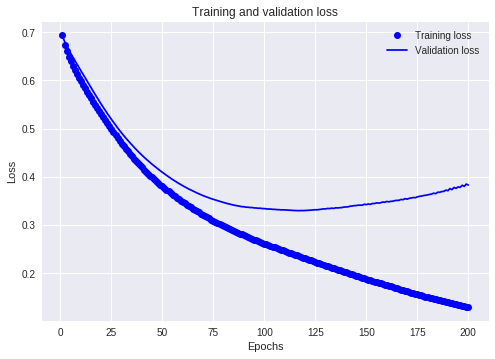

In [252]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

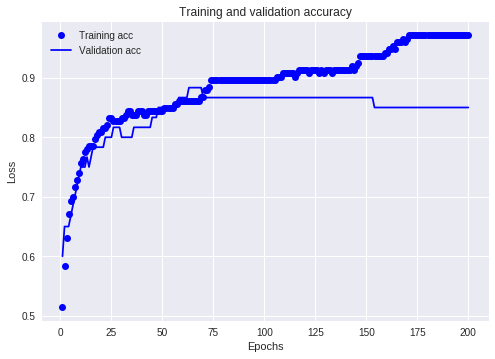

In [254]:

plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [255]:
model = models.Sequential()
model.add(layers.Dense(36, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_targets, epochs=70, batch_size=512)
results = model.evaluate(test_data, test_targets)

Epoch 1/70
233/233 [==============================] - 1s 5ms/step - loss: 0.8685 - acc: 0.5365
Epoch 2/70
233/233 [==============================] - 0s 26us/step - loss: 0.8162 - acc: 0.5408
Epoch 3/70
233/233 [==============================] - 0s 9us/step - loss: 0.7831 - acc: 0.5536
Epoch 4/70
233/233 [==============================] - 0s 20us/step - loss: 0.7587 - acc: 0.5622
Epoch 5/70
233/233 [==============================] - 0s 16us/step - loss: 0.7382 - acc: 0.5622
Epoch 6/70
233/233 [==============================] - 0s 11us/step - loss: 0.7207 - acc: 0.5665
Epoch 7/70
233/233 [==============================] - 0s 8us/step - loss: 0.7056 - acc: 0.5665
Epoch 8/70
233/233 [==============================] - 0s 8us/step - loss: 0.6922 - acc: 0.5708
Epoch 9/70
233/233 [==============================] - 0s 6us/step - loss: 0.6800 - acc: 0.5837
Epoch 10/70
233/233 [==============================] - 0s 6us/step - loss: 0.6684 - acc: 0.5837
Epoch 11/70
233/233 [========================

In [256]:
results

[0.4512909799814224, 0.7857142857142857]

In [257]:
model.predict(x_test)

array([[0.4664969 ],
       [0.38835636],
       [0.95747745],
       [0.34350342],
       [0.68710446],
       [0.1520366 ],
       [0.68459374],
       [0.9775095 ],
       [0.25404334],
       [0.8986783 ],
       [0.9670151 ],
       [0.8877866 ],
       [0.94449234],
       [0.5064558 ],
       [0.8692442 ],
       [0.1842938 ],
       [0.5833175 ],
       [0.91524494],
       [0.96436787],
       [0.320462  ],
       [0.44056967],
       [0.468897  ],
       [0.73943406],
       [0.26680905],
       [0.2741361 ],
       [0.2494502 ],
       [0.192781  ],
       [0.82433224],
       [0.8801539 ],
       [0.9919307 ],
       [0.6775497 ],
       [0.3021637 ],
       [0.9503819 ],
       [0.20410228],
       [0.22122166],
       [0.69603544],
       [0.12090996],
       [0.11442384],
       [0.89038926],
       [0.6579139 ],
       [0.91575027],
       [0.9365368 ],
       [0.33627024],
       [0.76780665],
       [0.23526287],
       [0.24142915],
       [0.8951533 ],
       [0.068